In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [37]:
data1.head()
# data1.shape


,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


In [38]:
data2.head()
# data2.shape

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560


In [98]:
data1 = data1.loc[:, ~data1.columns.str.contains('^Unnamed:')]

In [40]:
data1.head()

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240


In [99]:
data2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed:')]

In [42]:
data2.head()

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560


# For Data1

## Train-test split

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [83]:
X= data1['X']
y = data1['y']

X_train, X_test, y_train,y_test = train_test_split(data1[['X']], data1[['y']], test_size=0.2, random_state=100)

## Train a linear regression model

In [84]:
from sklearn.linear_model import LinearRegression, Ridge

model = LinearRegression()

model.fit(X_train,y_train)

score =  model.score(X_test,y_test)
score

0.9872328017796749

In [85]:
training_score =  model.score(X_train,y_train)
training_score

0.9897456391911691

## Evaluate/create residual plots

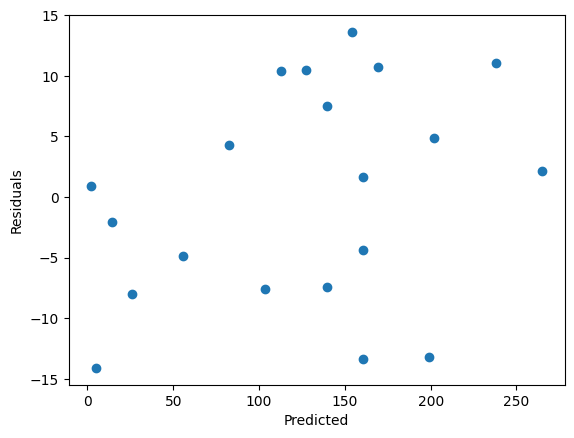

In [54]:
y_pred = model.predict(X_test)
residuals = y_test- y_pred
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.scatter(y_pred, residuals)
plt.show()

### Explain Findings

In [ ]:
Points are randomly scattered around Zero. Hence linear model is appropriate for this data  and there is no overfitting as well.

## For Data2

## Train-test split

Performing one hot encoding on categorical variables

In [144]:

features = [x for x in data2.columns if x != 'y']

X = data2[features]

y = data2['y']


In [145]:
X

,X1,X2
0,50,B
1,82,B
2,66,B
3,35,A
4,81,A
...,...,...
95,98,B
96,9,A
97,56,A
98,50,B


In [146]:
enc = OneHotEncoder()
dummies= enc.fit_transform(X[['X2']])
X = X.join(pd.DataFrame(dummies.toarray()))
X.drop("X2",axis = 1,inplace= True)
X.columns = ["X1","A","B"]
X.head()

,X1,A,B
0,50,0.0,1.0
1,82,0.0,1.0
2,66,0.0,1.0
3,35,1.0,0.0
4,81,1.0,0.0


In [147]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [152]:
X_train.shape

(80, 3)

## Train a linear regression model

In [148]:
from sklearn.linear_model import LinearRegression, Ridge

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score =  model.score(X_test,y_test)
score


0.8768471364265772

In [149]:
training_score =  model.score(X_train,y_train)
training_score

0.9278130787358521

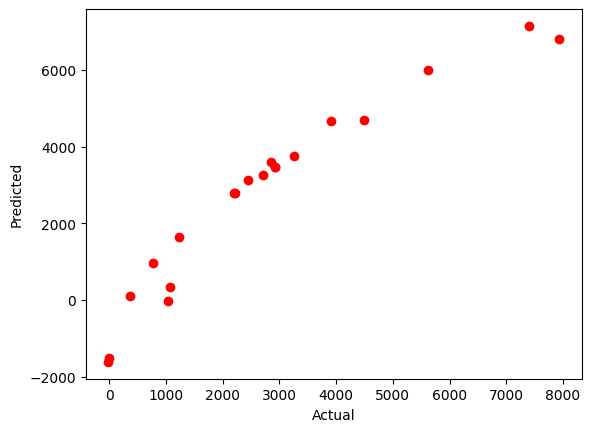

In [155]:
plt.plot(y_test,y_pred,'ro')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Evaluate/create residual plots

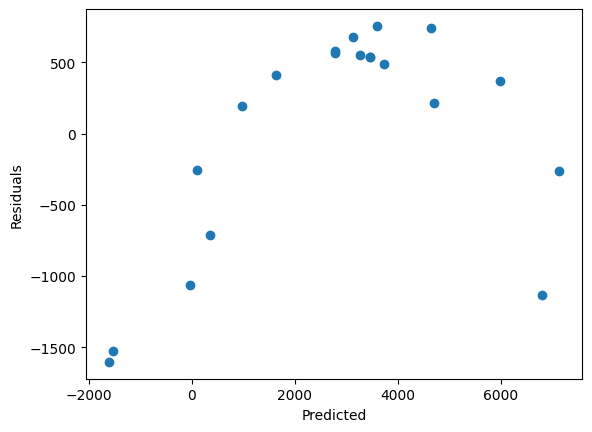

In [151]:
y_pred = model.predict(X_test)
residuals = y_pred- y_test
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.scatter(y_pred, residuals)
plt.show()

### Explain Findings

Points are randomly scattered around Zero. Hence linear model is appropriate for this data  and there is no overfitting as well.